<a href="https://colab.research.google.com/github/HagarElsherbiny/StockMarketPrediction/blob/main/Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
Amazon = pd.read_csv('/content/gdrive/My Drive/AMZN.csv')


In [7]:
Amazon.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-02,95.324501,97.725502,93.500000,97.697502,97.697502,135234000
1,2020-03-03,98.768501,99.816498,94.404503,95.449501,95.449501,150690000
2,2020-03-04,97.328499,98.900002,96.099998,98.791496,98.791496,95458000
3,2020-03-05,96.650002,98.036003,95.500000,96.201500,96.201500,94964000
4,2020-03-06,93.750000,95.543503,93.474998,95.054497,95.054497,105472000


In [8]:
Amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       755 non-null    object 
 1   Open       755 non-null    float64
 2   High       755 non-null    float64
 3   Low        755 non-null    float64
 4   Close      755 non-null    float64
 5   Adj Close  755 non-null    float64
 6   Volume     755 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 41.4+ KB


In [9]:
length_data = len(Amazon)     # rows that data has
split_ratio = 0.8          # %80 train + %20 validation
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 755
Train data length : 604
Validation data lenth : 151


In [11]:
train_data = Amazon[:length_train].iloc[:,:2] 
train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
train_data

,Date,Open
0,2020-03-02,95.324501
1,2020-03-03,98.768501
2,2020-03-04,97.328499
3,2020-03-05,96.650002
4,2020-03-06,93.750000
...,...,...
599,2022-07-18,115.000000
600,2022-07-19,115.699997
601,2022-07-20,118.620003
602,2022-07-21,123.199997


In [12]:
validation_data = Amazon[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
validation_data

,Date,Open
604,2022-07-25,122.699997
605,2022-07-26,115.790001
606,2022-07-27,117.309998
607,2022-07-28,121.570000
608,2022-07-29,134.899994
...,...,...
750,2023-02-22,95.099998
751,2023-02-23,96.120003
752,2023-02-24,93.529999
753,2023-02-27,94.279999


In [13]:
#Creating Train Dataset from Train split

dataset_train = train_data.Open.values
dataset_train.shape


(604,)

In [14]:
# Change 1d array to 2d array
# Changing shape from (1692,) to (1692,1)
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(604, 1)

In [15]:
#Normalization / Feature Scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(604, 1)

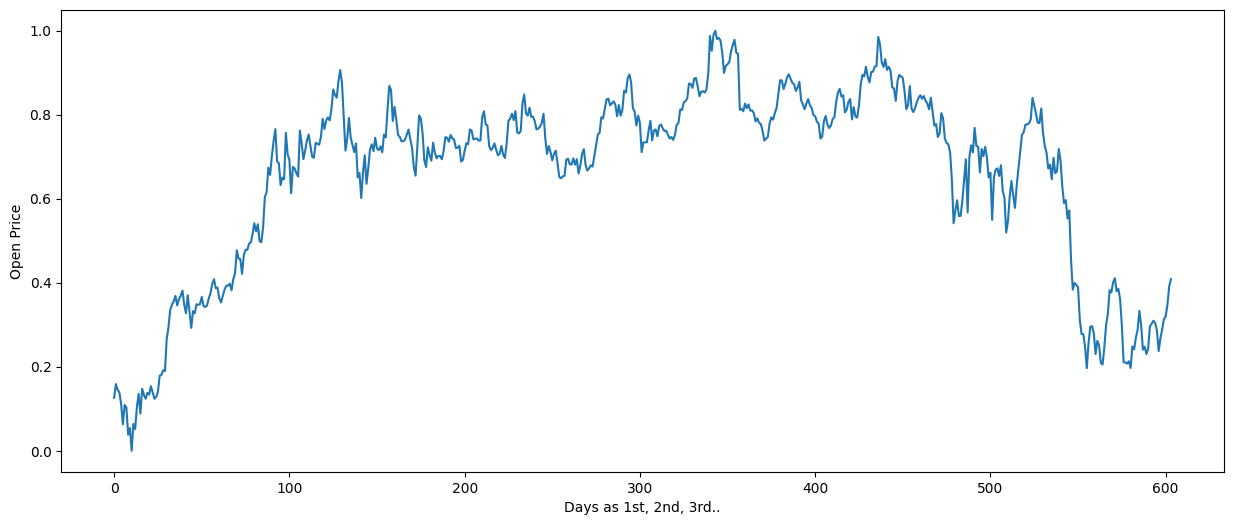

In [16]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

In [17]:
#Creating X_train and y_train from Training data

X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])

        
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [18]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (554, 50)
Shape of y_train before reshape : (554,)


In [19]:
#Reshape

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (554, 50, 1)
Shape of y_train after reshape : (554, 1)


In [20]:
X_train[0]

array([[0.12603153],
       [0.15879268],
       [0.14509462],
       [0.1386404 ],
       [0.11105404],
       [0.06294918],
       [0.10909445],
       [0.10289706],
       [0.03827366],
       [0.05397886],
       [0.        ],
       [0.06371492],
       [0.05160072],
       [0.10391964],
       [0.13545842],
       [0.08858066],
       [0.14743944],
       [0.13278542],
       [0.12389594],
       [0.13762253],
       [0.13380328],
       [0.15355126],
       [0.1386261 ],
       [0.12372474],
       [0.12824797],
       [0.14006729],
       [0.17864532],
       [0.18049554],
       [0.19157757],
       [0.18953242],
       [0.2658562 ],
       [0.29306683],
       [0.33507416],
       [0.34759739],
       [0.3559779 ],
       [0.36865811],
       [0.34601352],
       [0.36074847],
       [0.3688436 ],
       [0.38130507],
       [0.34748802],
       [0.32746891],
       [0.37019437],
       [0.33069833],
       [0.29244849],
       [0.33222038],
       [0.32719776],
       [0.348

In [21]:
y_train[0]

array([0.36639413])

In [22]:
#Creating RNN model

# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )


regressor.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 75, batch_size = 32)

Epoch 1/75
18/18 [==============================] - 5s 64ms/step - loss: 0.7086 - accuracy: 0.0000e+00
Epoch 2/75
18/18 [==============================] - 2s 94ms/step - loss: 0.4122 - accuracy: 0.0018
Epoch 3/75
18/18 [==============================] - 2s 91ms/step - loss: 0.3492 - accuracy: 0.0018
Epoch 4/75
18/18 [==============================] - 1s 78ms/step - loss: 0.3116 - accuracy: 0.0018
Epoch 5/75
18/18 [==============================] - 1s 52ms/step - loss: 0.2842 - accuracy: 0.0000e+00
Epoch 6/75
18/18 [==============================] - 1s 53ms/step - loss: 0.2628 - accuracy: 0.0018
Epoch 7/75
18/18 [==============================] - 1s 53ms/step - loss: 0.2605 - accuracy: 0.0000e+00
Epoch 8/75
18/18 [==============================] - 1s 52ms/step - loss: 0.2346 - accuracy: 0.0000e+00
Epoch 9/75
18/18 [==============================] - 1s 54ms/step - loss: 0.1990 - accuracy: 0.0018
Epoch 10/75
18/18 [==============================] - 1s 52ms/step - loss: 0.1842 - accuracy: 

In [23]:
#Evaluating Model


# Losses
history.history["loss"]

[0.708641767501831,
 0.4122105538845062,
 0.3491903841495514,
 0.31164219975471497,
 0.28424498438835144,
 0.26278457045555115,
 0.2605268359184265,
 0.23458433151245117,
 0.1989641636610031,
 0.18416719138622284,
 0.16196797788143158,
 0.16011503338813782,
 0.15383532643318176,
 0.1207951009273529,
 0.11774249374866486,
 0.1092512309551239,
 0.09857852011919022,
 0.09442773461341858,
 0.08871566504240036,
 0.07493650168180466,
 0.074486143887043,
 0.08850190043449402,
 0.06615301221609116,
 0.0634554922580719,
 0.06746448576450348,
 0.06452988088130951,
 0.05917106941342354,
 0.05557903274893761,
 0.04549616947770119,
 0.04316345974802971,
 0.05020444095134735,
 0.05331648141145706,
 0.04438990354537964,
 0.04943777993321419,
 0.049170851707458496,
 0.04262616112828255,
 0.038562580943107605,
 0.03551864251494408,
 0.030679330229759216,
 0.032082609832286835,
 0.031116200610995293,
 0.031319841742515564,
 0.026839284226298332,
 0.0302123986184597,
 0.02671237476170063,
 0.028255395591

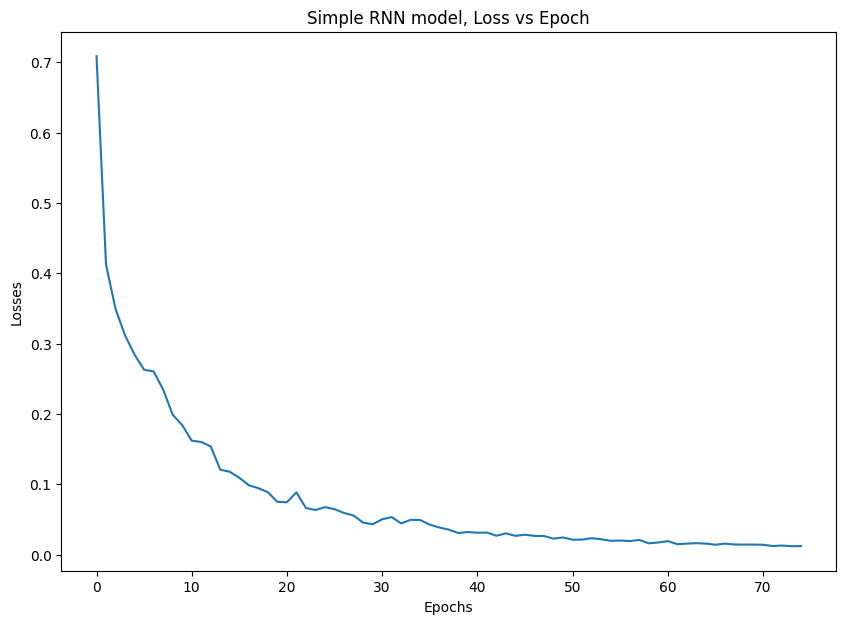

In [24]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

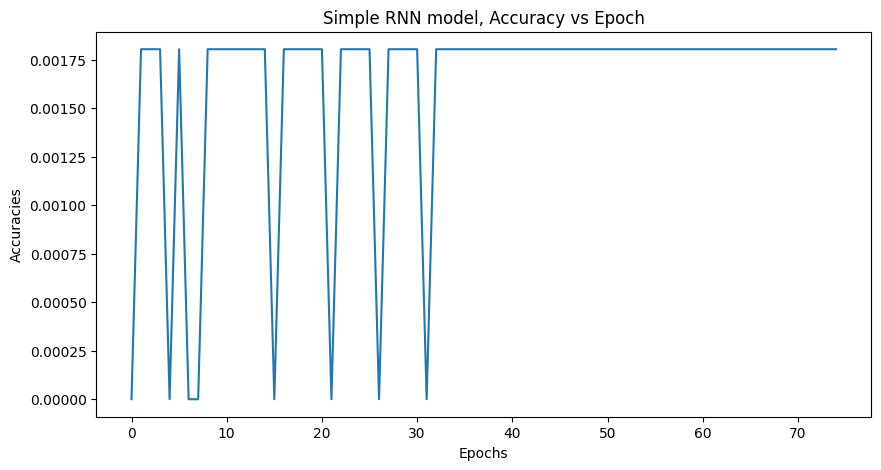

In [25]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

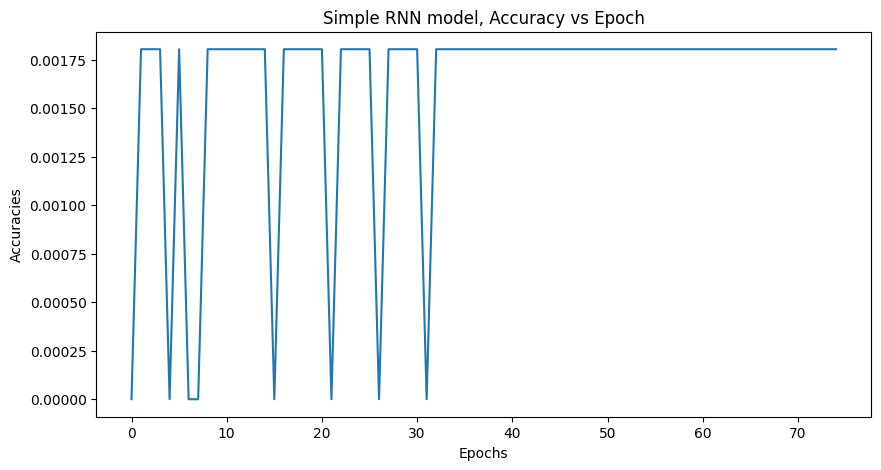

In [26]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

In [32]:

#Model predictions for train data

y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

18/18 [==============================] - 1s 25ms/step


(554, 1)

In [33]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(554, 1)

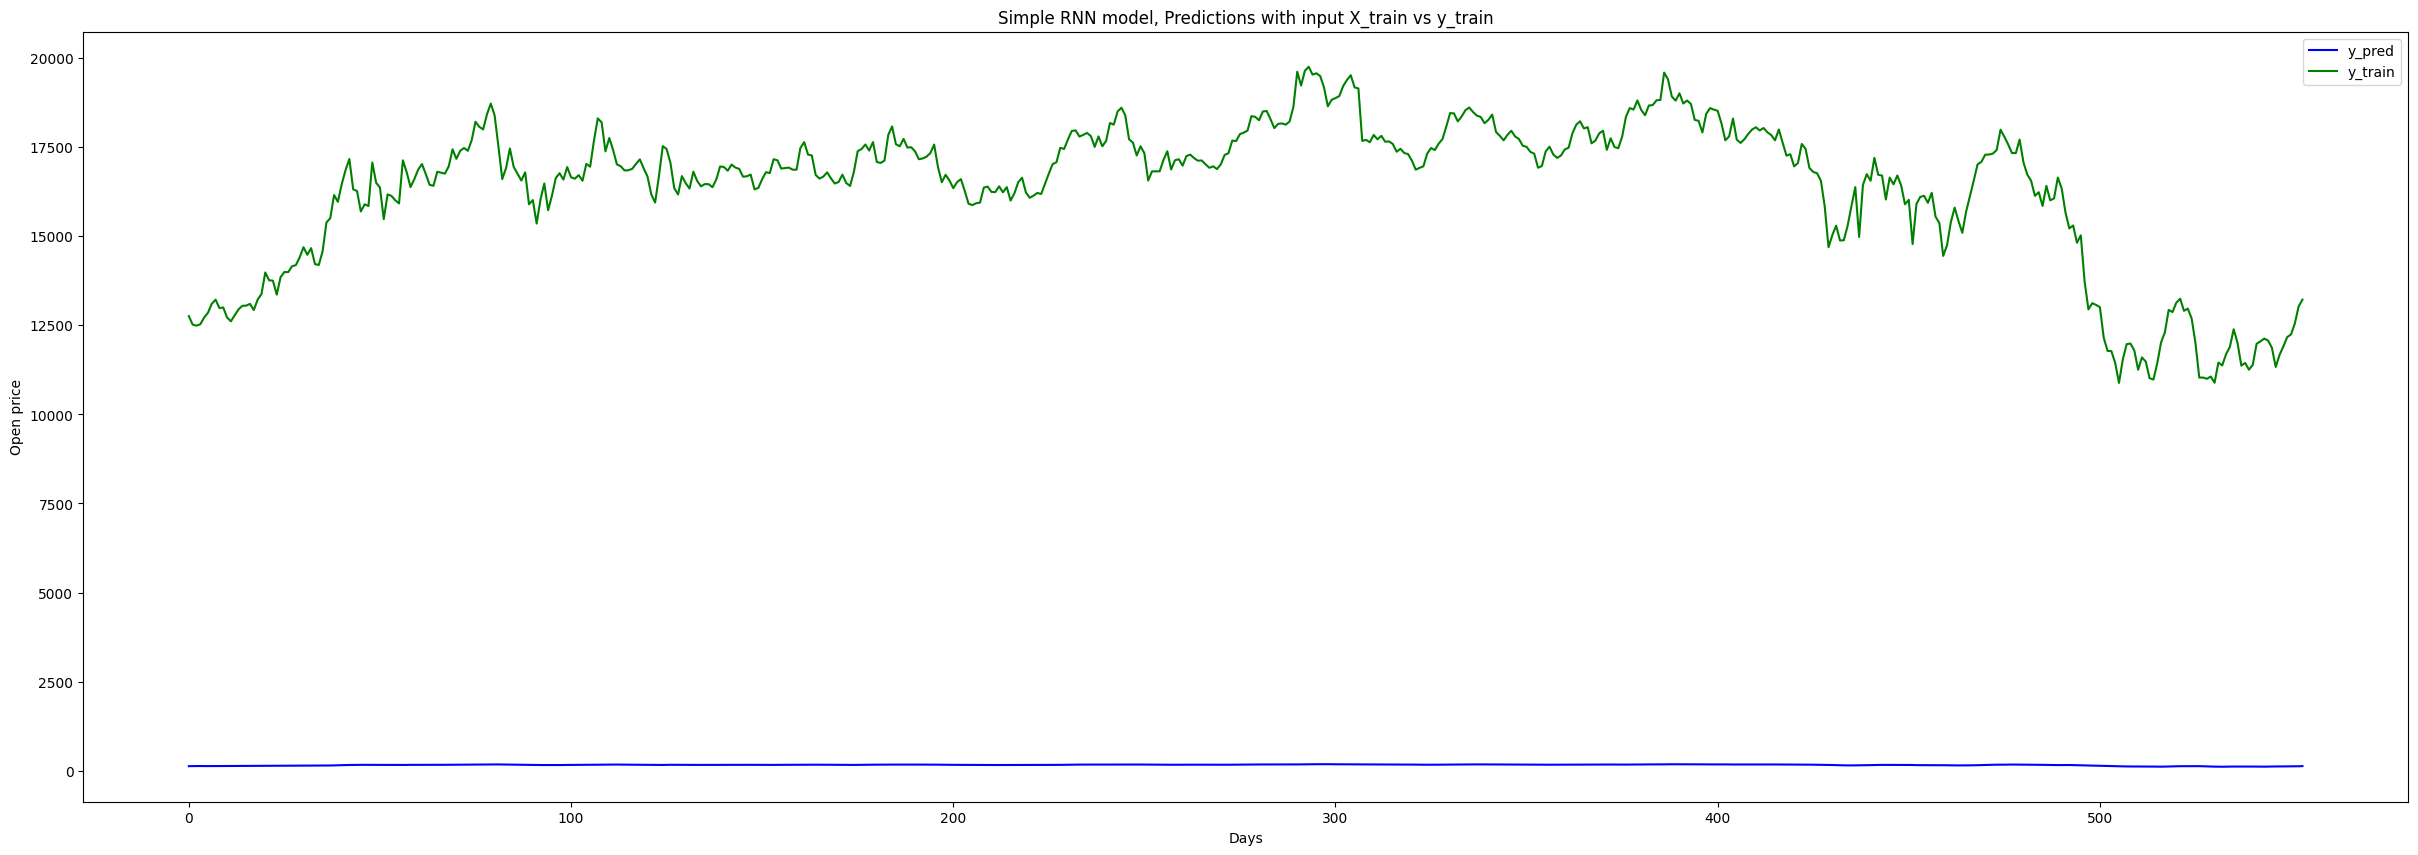

In [34]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

In [35]:
#Creating Test Dataset from Validation Data

#Converting array and scaling

dataset_validation = validation_data.Open.values  # getting "open" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (151, 1)


In [36]:
#Creating X_test and y_test

X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

In [37]:
# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [38]:
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (101, 50)
Shape of y_test before reshape : (101,)


In [39]:
#Reshape

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array

In [40]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (101, 50, 1)
Shape of y_test after reshape : (101, 1)


In [41]:
#Evaluating with Validation Data

# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

4/4 [==============================] - 0s 26ms/step
Shape of y_pred_of_test : (101, 1)


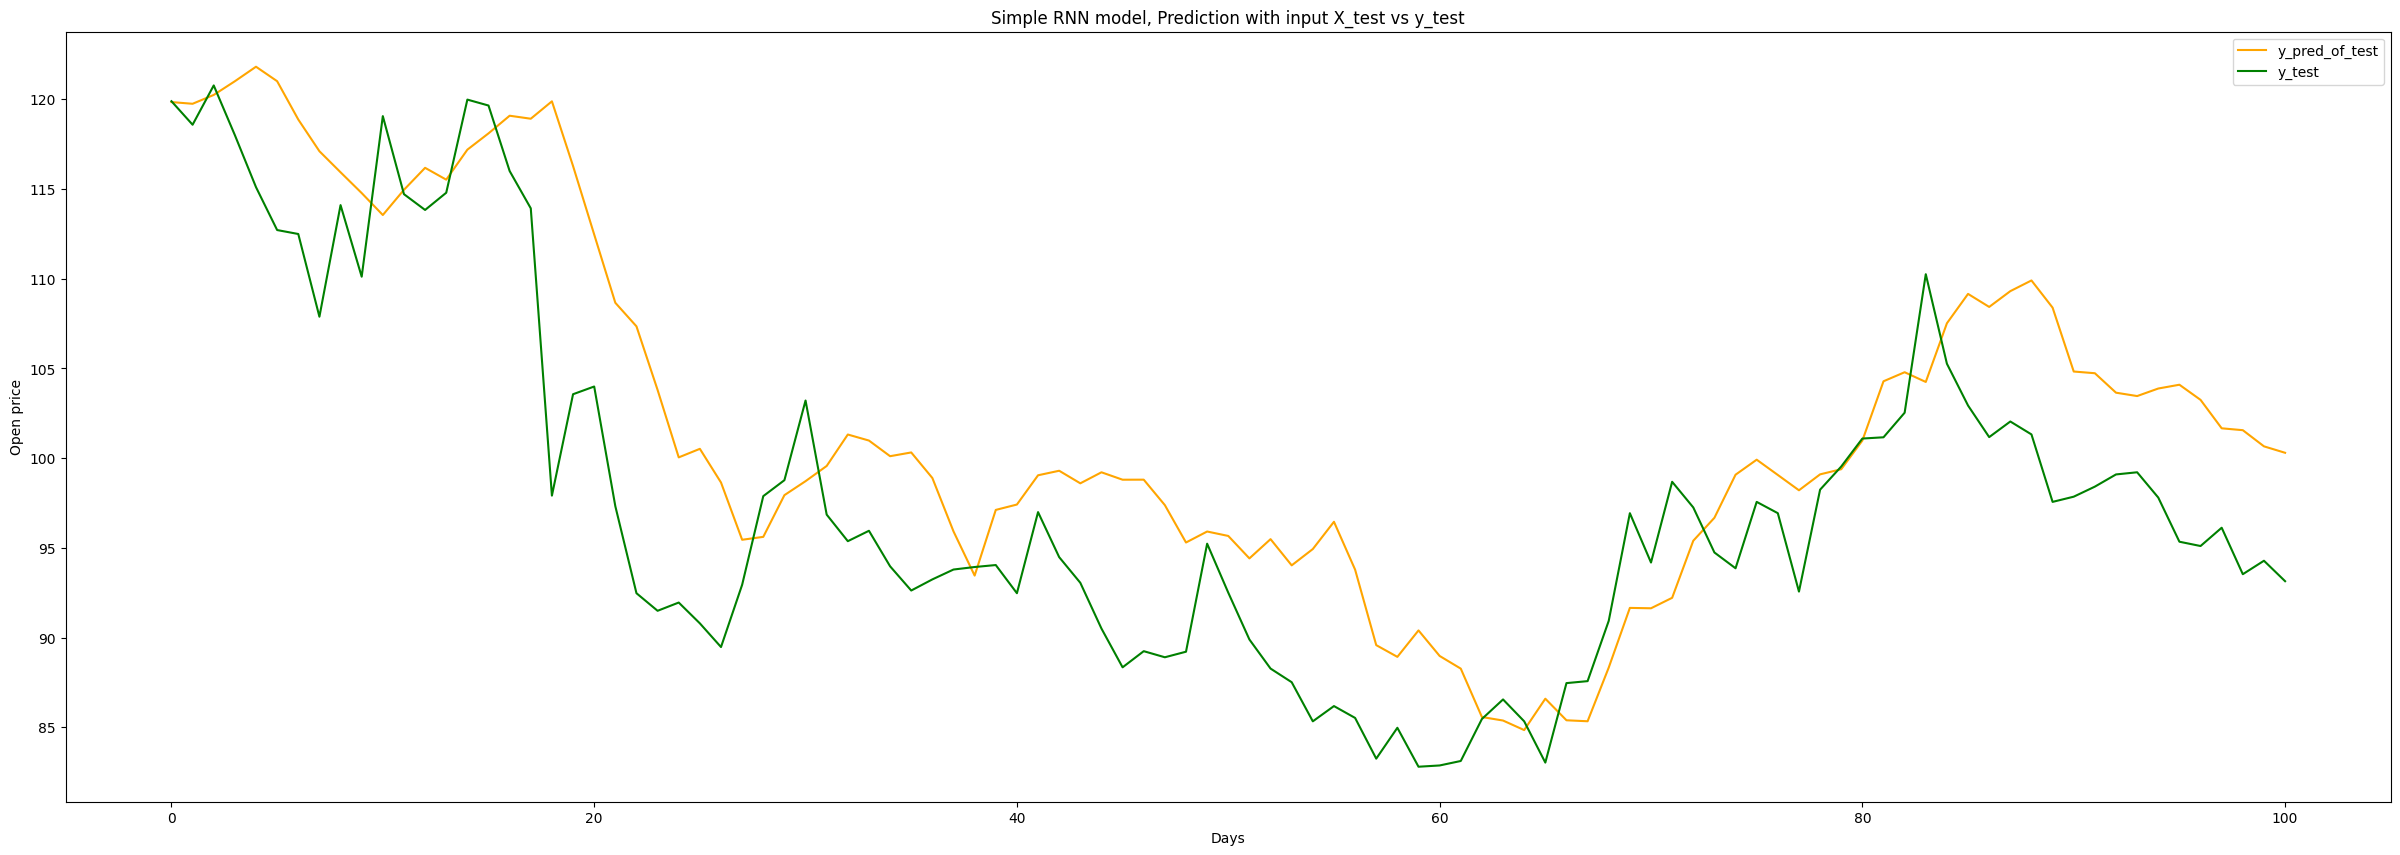

In [42]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

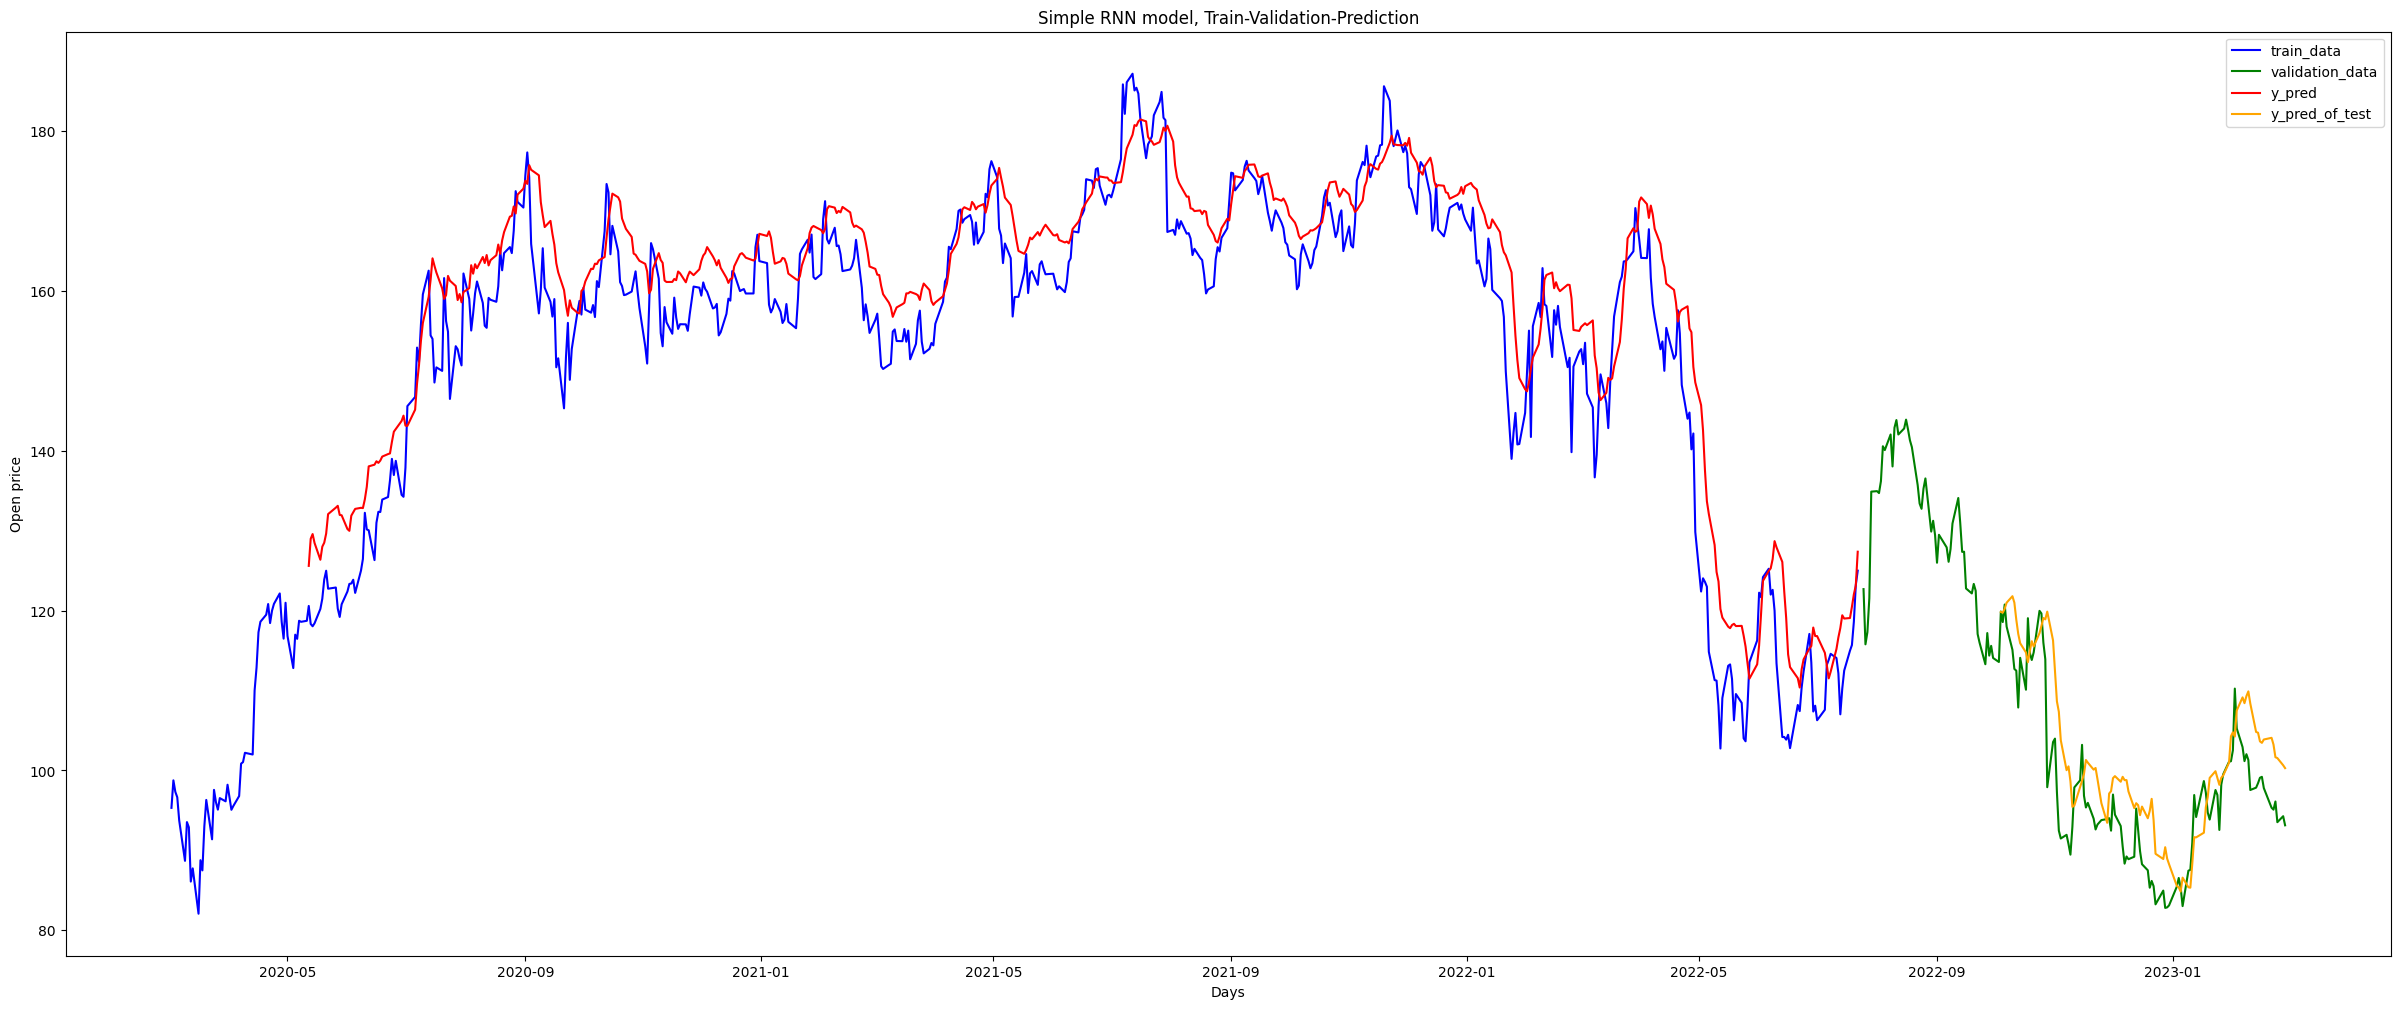

In [43]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.Open, label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data.Open, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

In [44]:
#Creating LSTM Model

y_train = scaler.fit_transform(y_train)


In [46]:
#Creating LSTM Model

from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(
    LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) #64 lstm neuron block
model_lstm.add(
    LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))
model_lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = model_lstm.fit(X_train, y_train, epochs = 75, batch_size = 10)

Epoch 1/75
56/56 [==============================] - 9s 62ms/step - loss: 0.0350 - accuracy: 0.0036
Epoch 2/75
56/56 [==============================] - 3s 51ms/step - loss: 0.0091 - accuracy: 0.0036
Epoch 3/75
56/56 [==============================] - 3s 50ms/step - loss: 0.0081 - accuracy: 0.0036
Epoch 4/75
56/56 [==============================] - 3s 51ms/step - loss: 0.0070 - accuracy: 0.0036
Epoch 5/75
56/56 [==============================] - 4s 79ms/step - loss: 0.0063 - accuracy: 0.0036
Epoch 6/75
56/56 [==============================] - 3s 51ms/step - loss: 0.0055 - accuracy: 0.0036
Epoch 7/75
56/56 [==============================] - 3s 51ms/step - loss: 0.0059 - accuracy: 0.0036
Epoch 8/75
56/56 [==============================] - 3s 50ms/step - loss: 0.0050 - accuracy: 0.0036
Epoch 9/75
56/56 [==============================] - 4s 65ms/step - loss: 0.0041 - accuracy: 0.0036
Epoch 10/75
56/56 [==============================] - 4s 67ms/step - loss: 0.0046 - accuracy: 0.0036
Epoch 11/

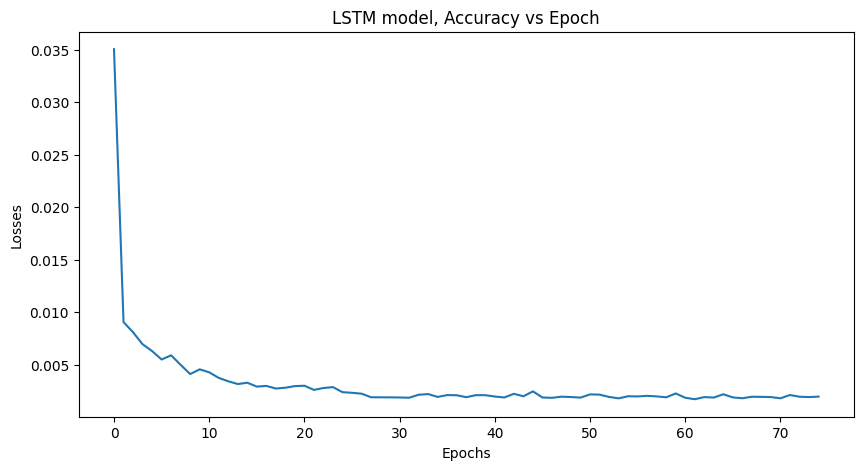

In [47]:
#Evaluating LSTM Model

plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

4/4 [==============================] - 1s 20ms/step


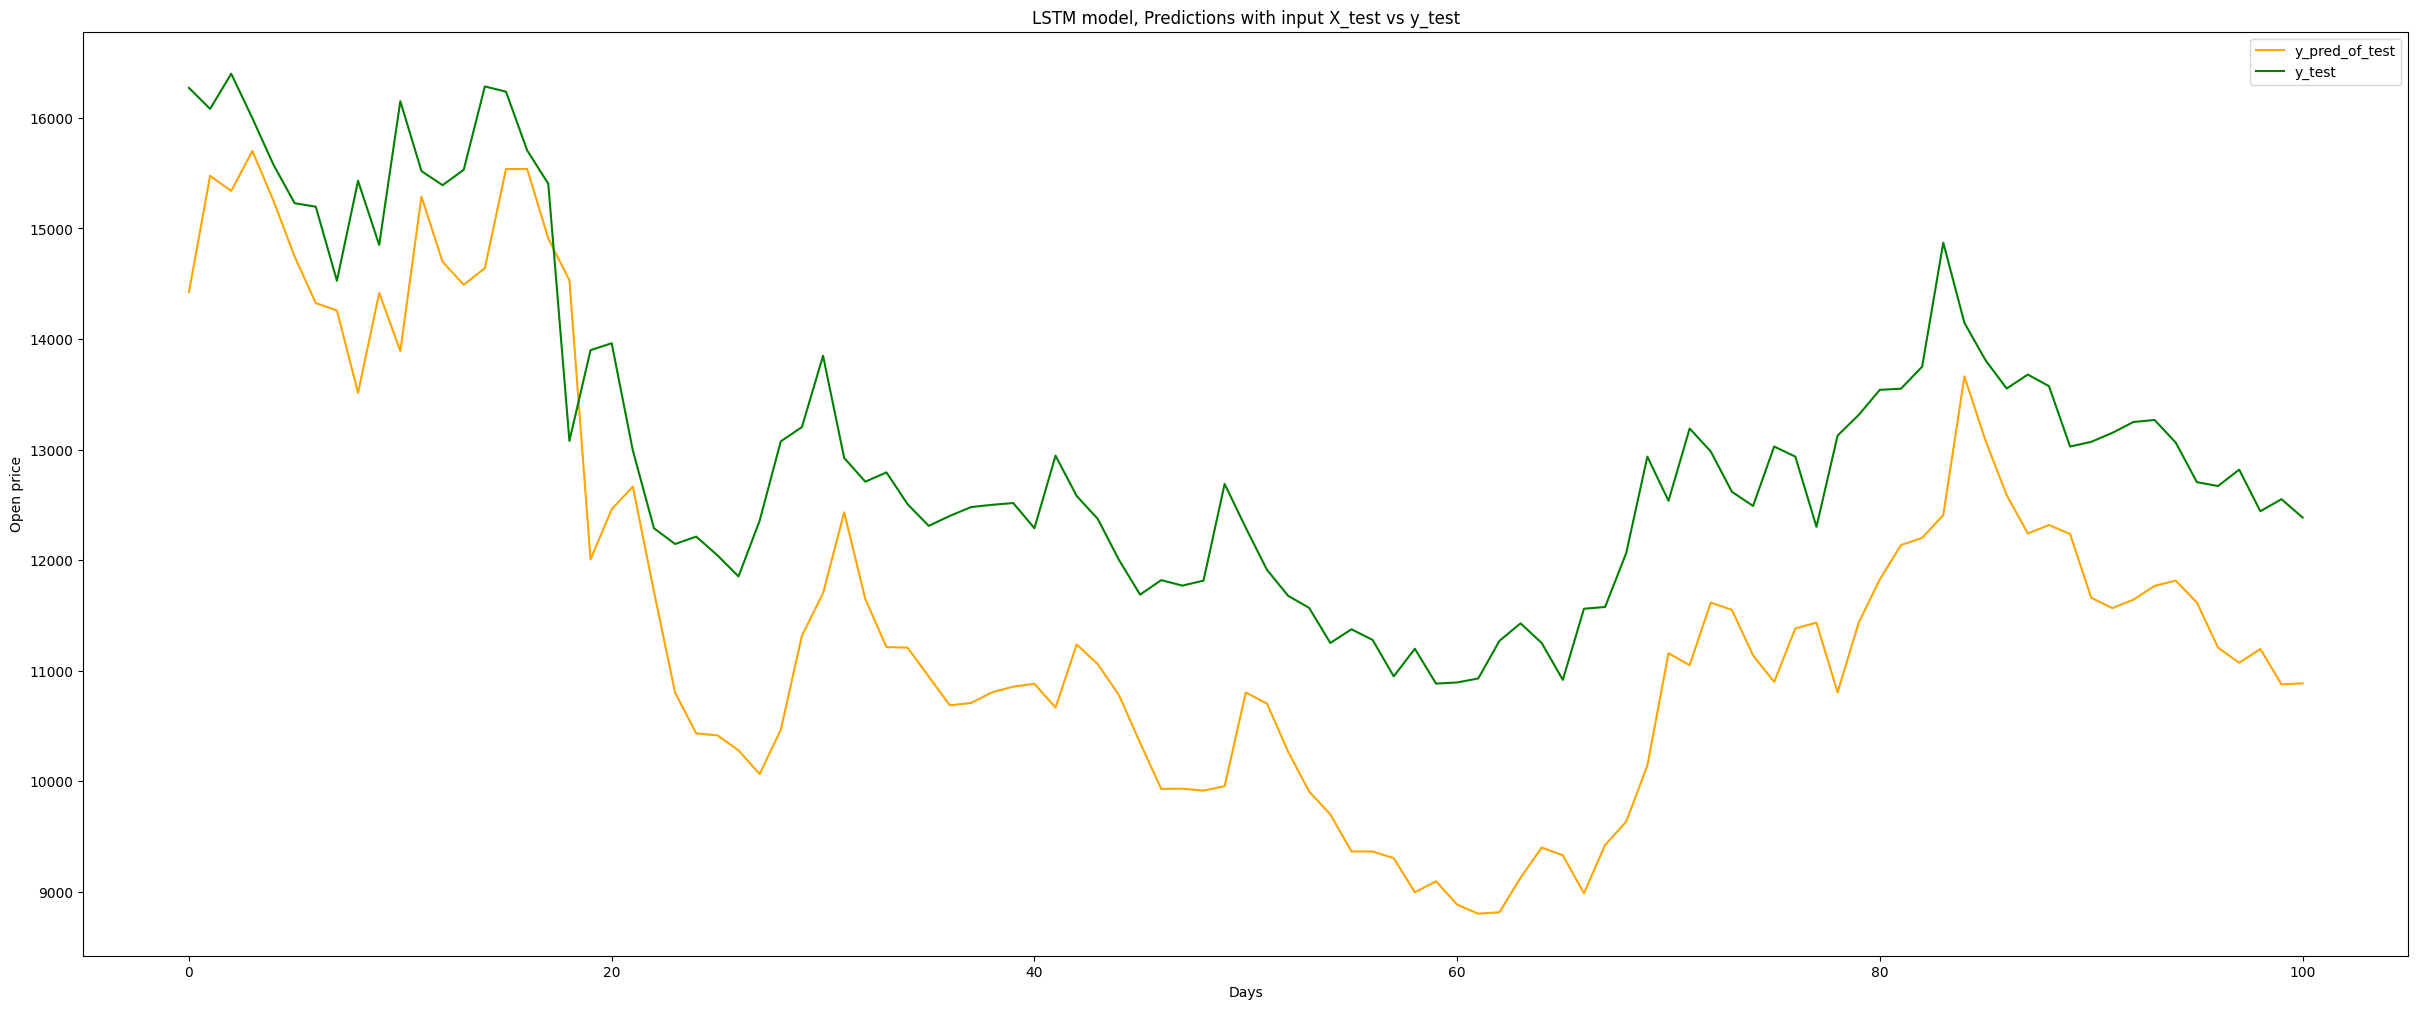

In [48]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model_lstm.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

In [49]:
#Future price prediction

Amazon.iloc[-1]

Date         2023-02-28
Open          93.139999
High          94.690002
Low           92.919998
Close         94.230003
Adj Close     94.230003
Volume         43959300
Name: 754, dtype: object

In [50]:
X_input = Amazon.iloc[-time_step:].Open.values               # getting last 50 rows and converting to array
X_input = scaler.fit_transform(X_input.reshape(-1,1))      # converting to 2D array and scaling
X_input = np.reshape(X_input, (1,50,1))                    # reshaping : converting to 3D array
print("Shape of X_input :", X_input.shape)
X_input

Shape of X_input : (1, 50, 1)


array([[[0.25828768],
        [0.19927121],
        [0.17158468],
        [0.09216755],
        [0.12313287],
        [0.09908905],
        [0.01639334],
        [0.07905276],
        [0.        ],
        [0.00255009],
        [0.01165756],
        [0.09690333],
        [0.13661204],
        [0.09216755],
        [0.00837873],
        [0.16976308],
        [0.1737704 ],
        [0.29617479],
        [0.51475405],
        [0.41457189],
        [0.57850633],
        [0.52641161],
        [0.43497254],
        [0.40291436],
        [0.53770479],
        [0.51475405],
        [0.35555541],
        [0.56247711],
        [0.60947169],
        [0.66630219],
        [0.66885257],
        [0.71876132],
        [1.        ],
        [0.81821499],
        [0.7333333 ],
        [0.66921665],
        [0.70091075],
        [0.6746812 ],
        [0.53770479],
        [0.54826946],
        [0.56867041],
        [0.59344243],
        [0.59781413],
        [0.54644815],
        [0.4568304 ],
        [0

In [51]:
simple_RNN_prediction = scaler.inverse_transform(regressor.predict(X_input))
LSTM_prediction = scaler.inverse_transform(model_lstm.predict(X_input))
print("Simple RNN, Open price prediction for 24/10/2022     :", simple_RNN_prediction[0,0])
print("LSTM prediction, Open price prediction for 24/10/2022 :", LSTM_prediction[0,0])

1/1 [==============================] - 0s 42ms/step
Simple RNN, Open price prediction for 24/10/2022     : 97.63027
LSTM prediction, Open price prediction for 24/10/2022 : 89.56277
